In this script we want to try to:
    - load a trained styleGAN generator and using it to generate a synthetic image

In [60]:
import os
import sys
import random as rnd
sys.path.append('/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/stylegan')
import pickle
import PIL.Image
import numpy as np
import dnnlib
import config
import dnnlib.tflib as tflib
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
PATH_GAN = '/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/results_styleGAN/00005-sgan-sdo-4gpu/network-snapshot-008040.pkl'
PATH_PLOTS = '/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/results_styleGAN/plots'

In [23]:
tflib.init_tf()
with open(PATH_GAN, 'rb') as pickle_file:
    _, _, Gs_network = pickle.load(pickle_file)
    # Pick latent vector.
    rnd = np.random.RandomState(5)
    latents = rnd.randn(1, Gs_network.input_shape[1])
    
    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs_network.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

In [61]:
img_name = 'test_synthetic_img'
img = PIL.Image.fromarray(images[0], 'RGB')
img.save(os.path.join(PATH_PLOTS, f'{img_name}.png'), 'PNG')

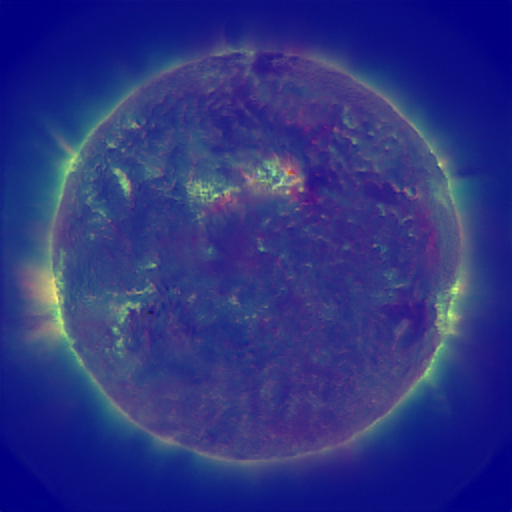

In [62]:
Image(filename=os.path.join(PATH_PLOTS, f'{img_name}.png'))